# Day-3  IBM SME


*  deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
#creating training data
#featues :study hours and sleep hours
X=np.array([[2,9],
            [1,5],
            [3,6],
            [4,8],
            [6,9],
            [5,5],
            [7,3]]
           ,dtype=float)

In [ ]:
#labels:1:pass,0=fail
y=np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [0],
    [1]
],dtype=float)

In [ ]:
#normalize data
X=X/np.amax(X,axis=0)

In [ ]:
model= keras.Sequential([
    layers.Dense(4,input_dim=2,activation='relu'),
    layers.Dense(1,activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', #adjusts weights during training
              loss='binary_crossentropy', #shows loss
              metrics=['accuracy'])

In [ ]:
model.fit(X,y,epochs=200,verbose=0)

In [ ]:
test_data=np.array([[4,7]])/np.amax(X,axis=0)
prediction=model.predict(test_data)
print("predicted output (1=pass, 0=fail): ", prediction)
if prediction >=0.5:
  print("the student is likely to pass")
else:
  print("the student is likely to fail")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicted output (1=pass, 0=fail):  [[0.7325716]]
the student is likely to pass


# PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
#load datasets
iris=load_iris()
X=iris.data
y=iris.target


In [ ]:
#apply pca reduce 4D to 2D
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

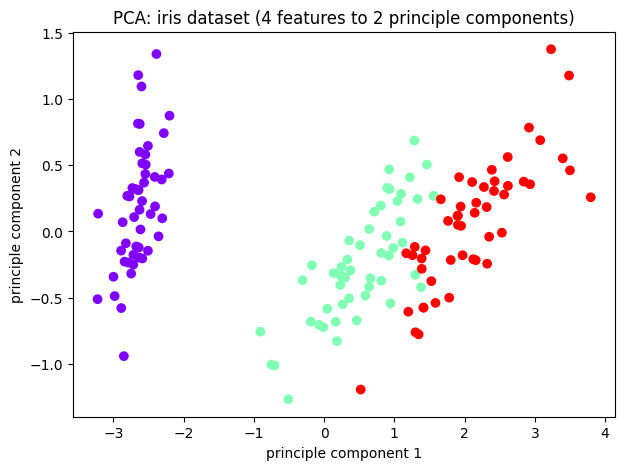

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='rainbow')
plt.title("PCA: iris dataset (4 features to 2 principle components)")
plt.xlabel("principle component 1")
plt.ylabel("principle component 2")
plt.show()

# M MEAN CLUSTERING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#sample data
X=np.array([
    [1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2],[9,3]
])

In [ ]:
Kmeans = KMeans(n_clusters=3,random_state=0)

In [ ]:
Kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
centroid=Kmeans.cluster_centers_
labels=Kmeans.labels_

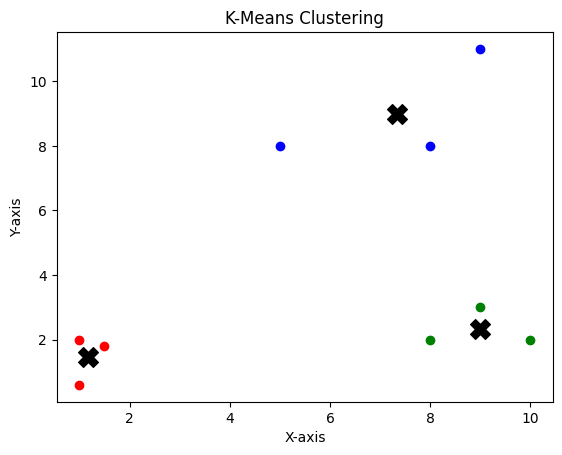

In [ ]:
# Step-6: Visualize the clusters
colors = ["red", "green", "blue"]

for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])

plt.scatter(centroid[:, 0], centroid[:, 1], marker='X', s=200, color='black')
plt.title("K-Means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# hierarchy clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [ ]:
#sample data
X=np.array([
    [1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2],[9,3]
])

In [ ]:
#perform hierarchical clustering
Z=linkage(X,method='ward')

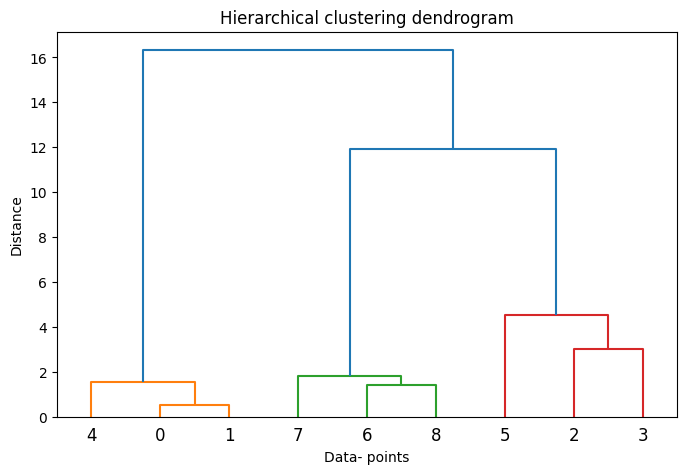

In [ ]:
#plot the dendrogram
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Data- points")
plt.ylabel("Distance")
plt.show()

In [ ]:
clusters=fcluster(Z,t=3,criterion='maxclust')
print("cluster labels: ", clusters)

cluster labels:  [1 1 3 3 1 3 2 2 2]
